# Employee Layoffs Since Covid19 

### DATA SOURCE :

DATASET 1 : https://www.kaggle.com/datasets/swaptr/layoffs-2022

DATASET 2 : https://fred.stlouisfed.org/series/FEDFUNDS

## The Recent News that META laid off employees in large number. Lets see what caused that.

In [1]:
# Importing Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as mno
%matplotlib inline
import plotly.express as px

#### Loading DataSet 1

In [2]:
df = pd.read_csv("layoffs.csv", low_memory=False)


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1731 entries, 0 to 1730
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1731 non-null   object 
 1   location             1731 non-null   object 
 2   industry             1726 non-null   object 
 3   total_laid_off       1217 non-null   float64
 4   percentage_laid_off  1160 non-null   float64
 5   date                 1730 non-null   object 
 6   stage                1727 non-null   object 
 7   country              1731 non-null   object 
 8   funds_raised         1603 non-null   float64
dtypes: float64(3), object(6)
memory usage: 121.8+ KB


In [4]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
0,Swyftx,Brisbane,Crypto,90.0,0.40,12/5/22,Unknown,Australia,NaN
1,OYO,Gurugram,Travel,600.0,NaN,12/3/22,Series F,India,4000.0
2,HealthifyMe,Bengaluru,Fitness,150.0,NaN,12/3/22,Series C,India,100.0
3,Bybit,Singapore,Crypto,NaN,0.30,12/3/22,Unknown,Singapore,NaN
4,Cognyte,Tel Aviv,Security,100.0,0.05,12/2/22,Unknown,Israel,NaN
5,ShareChat,Bengaluru,Consumer,100.0,NaN,12/2/22,Unknown,India,1700.0
6,Polly,Burlington,Finance,47.0,0.15,12/2/22,Series C,United States,184.0
7,Lora DiCarlo,Bend,Consumer,NaN,1.00,12/2/22,Unknown,United States,9.0
8,Carousell,Singapore,Retail,110.0,0.10,12/1/22,Private Equity,Singapore,372.0
9,Bizzabo,New York City,Marketing,100.0,0.37,12/1/22,Series E,United States,194.0


In [5]:
df.shape

(1731, 9)

## Data Cleaning

<AxesSubplot:>

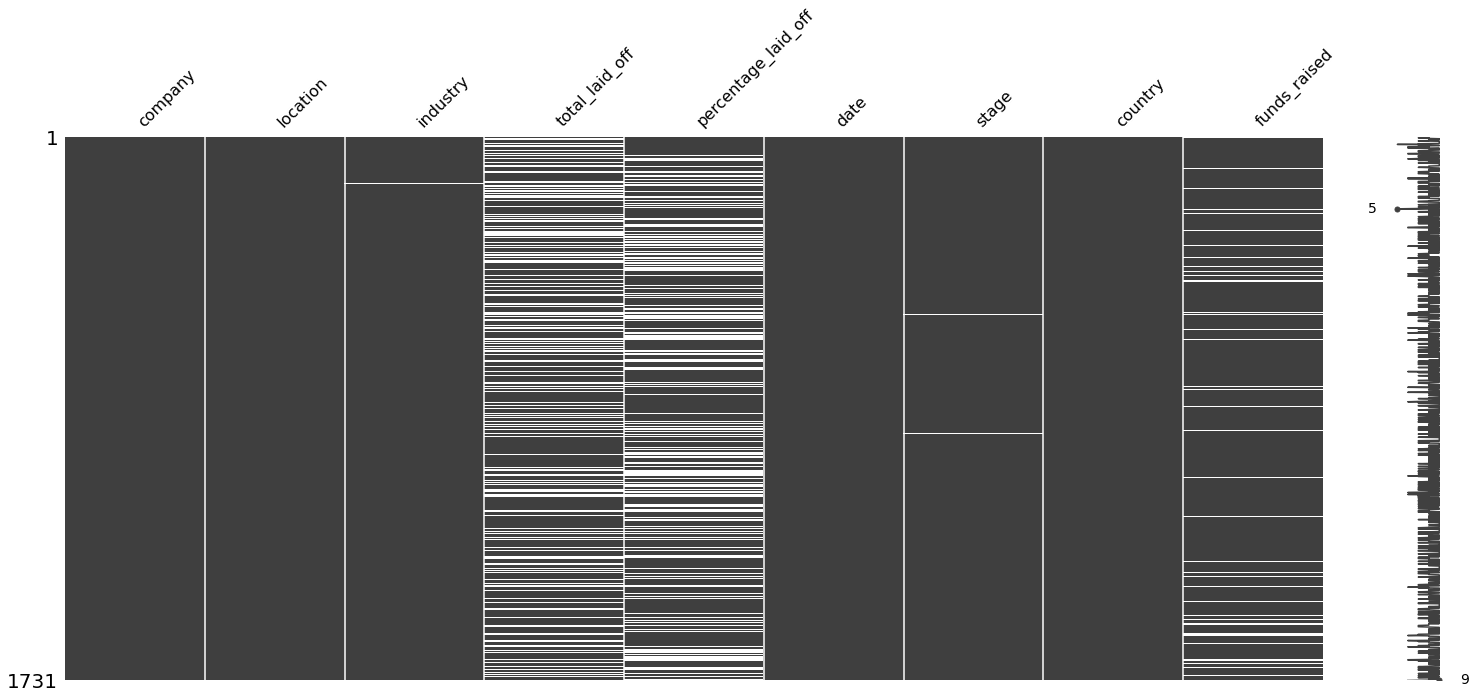

In [6]:
#Looking for null values
mno.matrix(df)

In [7]:
df.isnull().sum()

company                  0
location                 0
industry                 5
total_laid_off         514
percentage_laid_off    571
date                     1
stage                    4
country                  0
funds_raised           128
dtype: int64

In [8]:
df.dropna(how='any', inplace=True)

<AxesSubplot:>

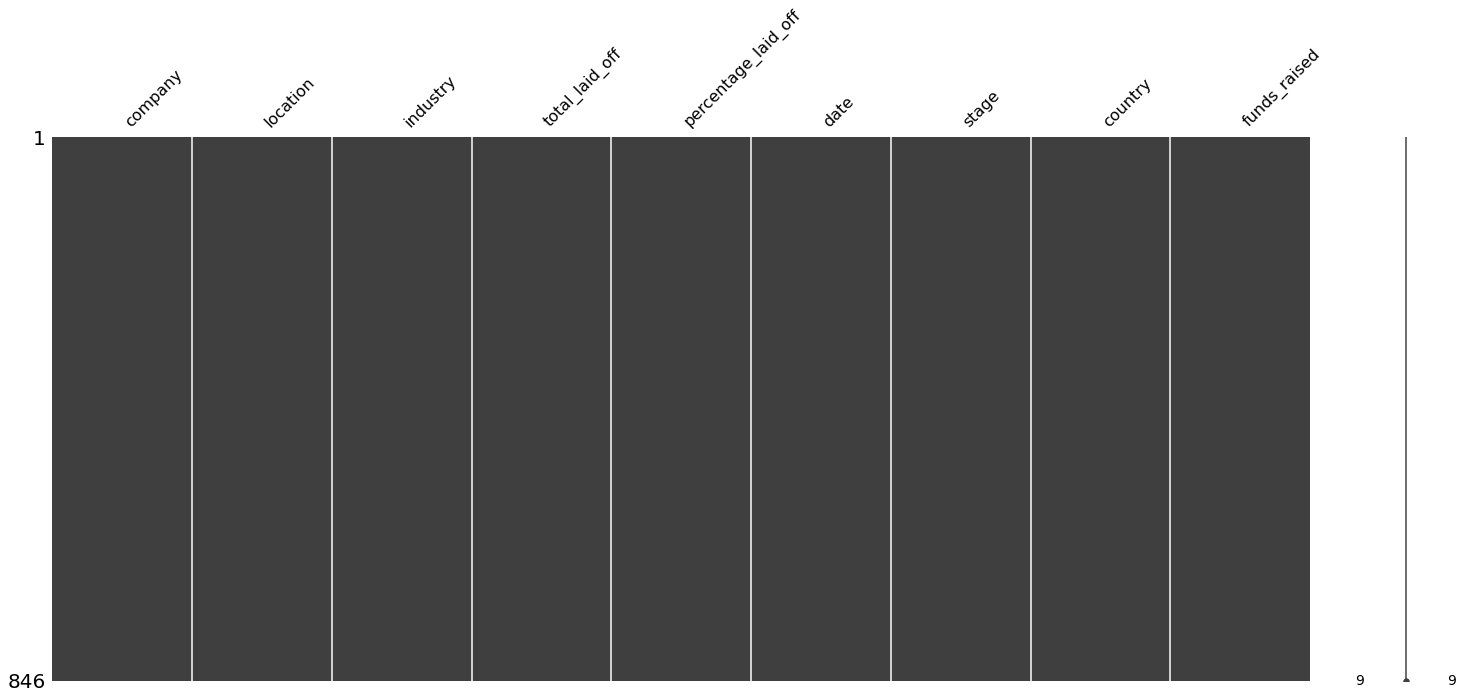

In [9]:
mno.matrix(df)

In [10]:
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
6,Polly,Burlington,Finance,47.0,0.15,12/2/22,Series C,United States,184.0
8,Carousell,Singapore,Retail,110.0,0.10,12/1/22,Private Equity,Singapore,372.0
9,Bizzabo,New York City,Marketing,100.0,0.37,12/1/22,Series E,United States,194.0
14,DoorDash,SF Bay Area,Food,1250.0,0.06,11/30/22,IPO,United States,2500.0
15,Kraken,SF Bay Area,Crypto,1100.0,0.30,11/30/22,Unknown,United States,134.0
16,Happy Money,Los Angeles,Finance,158.0,0.34,11/30/22,Series D,United States,191.0
17,Ula,Jakarta,Retail,134.0,0.23,11/30/22,Series B,Indonesia,140.0
18,Wonder,New York City,Food,130.0,0.07,11/30/22,Series B,United States,850.0
19,Grin,Sacramento,Marketing,60.0,0.13,11/30/22,Series B,United States,145.0
20,Ualá,Buenos Aires,Finance,53.0,0.03,11/30/22,Series D,Argentina,544.0


### Validating date column to make sure everything is formatted

In [11]:
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
6,Polly,Burlington,Finance,47.0,0.15,2022-12-02,Series C,United States,184.0
8,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
9,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
14,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-30,IPO,United States,2500.0
15,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-30,Unknown,United States,134.0
16,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-30,Series D,United States,191.0
17,Ula,Jakarta,Retail,134.0,0.23,2022-11-30,Series B,Indonesia,140.0
18,Wonder,New York City,Food,130.0,0.07,2022-11-30,Series B,United States,850.0
19,Grin,Sacramento,Marketing,60.0,0.13,2022-11-30,Series B,United States,145.0
20,Ualá,Buenos Aires,Finance,53.0,0.03,2022-11-30,Series D,Argentina,544.0


In [12]:
df['date'] = df['date'].dt.to_period('M').dt.to_timestamp()
df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised
6,Polly,Burlington,Finance,47.0,0.15,2022-12-01,Series C,United States,184.0
8,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0
9,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0
14,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-01,IPO,United States,2500.0
15,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-01,Unknown,United States,134.0


### Reading DatsSet 2

In [13]:
df2 = pd.read_csv("FEDFUNDS.csv")

In [14]:
df2.head()

,DATE,FEDFUNDS
0,7/1/1954,0.80
1,8/1/1954,1.22
2,9/1/1954,1.07
3,10/1/1954,0.85
4,11/1/1954,0.83


In [15]:
df2.tail()

,DATE,FEDFUNDS
817,8/1/2022,2.33
818,9/1/2022,2.56
819,10/1/2022,3.08
820,11/1/2022,3.78
821,12/1/2022,3.76


In [16]:
df2['DATE'] = pd.to_datetime(df2['DATE'])
df2.head(10)

,DATE,FEDFUNDS
0,1954-07-01,0.80
1,1954-08-01,1.22
2,1954-09-01,1.07
3,1954-10-01,0.85
4,1954-11-01,0.83
5,1954-12-01,1.28
6,1955-01-01,1.39
7,1955-02-01,1.29
8,1955-03-01,1.35
9,1955-04-01,1.43


## Merging Data Set 1 and Data Set 2

In [17]:
newDf = pd.merge(df, df2, left_on="date", right_on="DATE", how = "outer")

### Cleaning new DataSet

<AxesSubplot:>

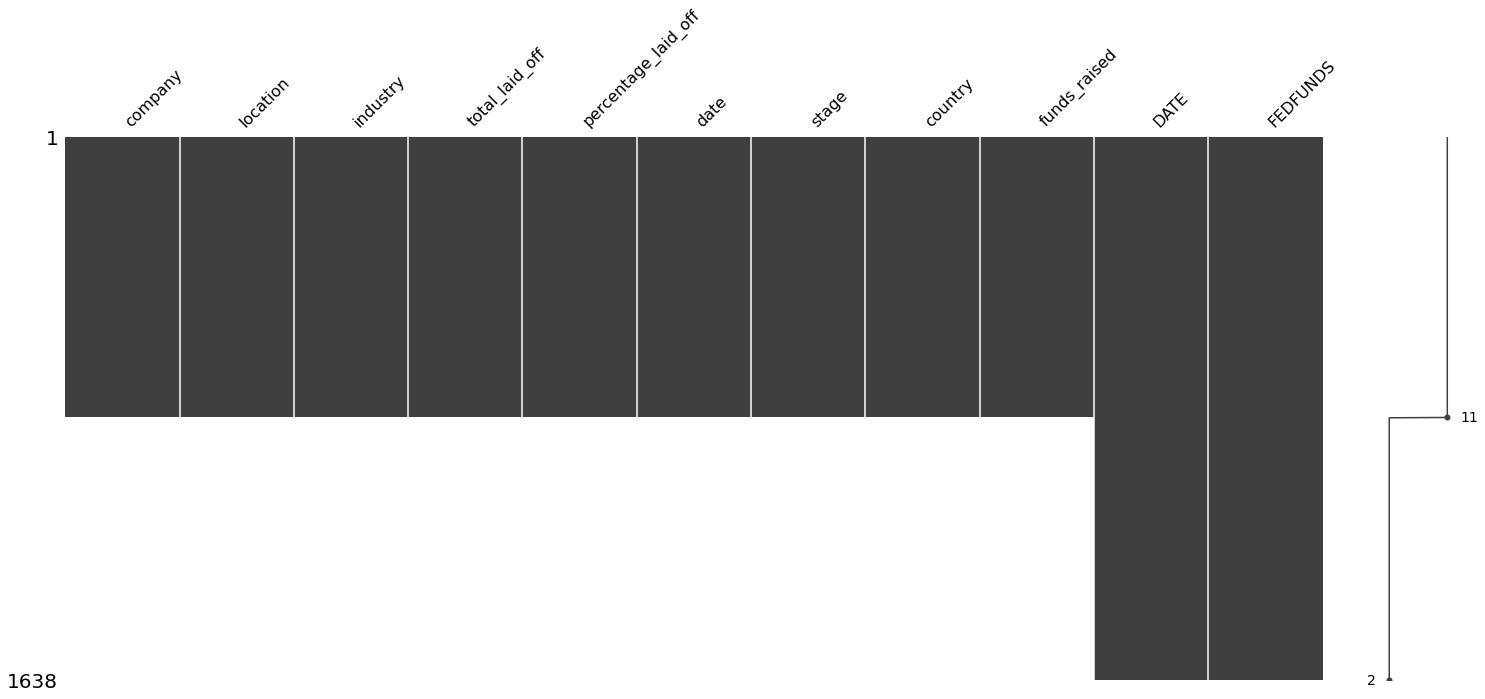

In [18]:
mno.matrix(newDf)

<AxesSubplot:>

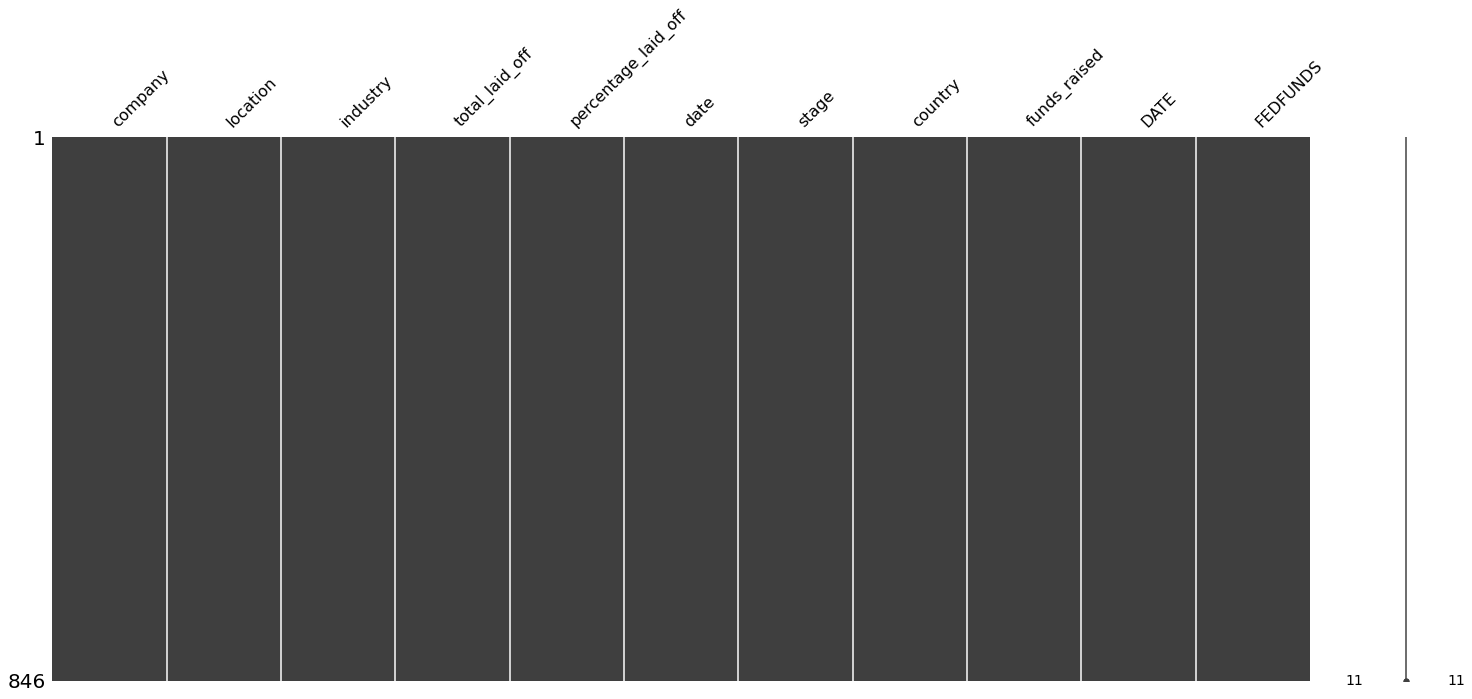

In [19]:
newDf.dropna(how='any', inplace=True)
mno.matrix(newDf)

In [20]:
newDf.rename(columns = {'DATE':'FedDate', 'FEDFUNDS' : 'interestRate'}, inplace = True)
newDf.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,FedDate,interestRate
0,Polly,Burlington,Finance,47.0,0.15,2022-12-01,Series C,United States,184.0,2022-12-01,3.76
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0,2022-12-01,3.76
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0,2022-12-01,3.76
3,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-01,IPO,United States,2500.0,2022-11-01,3.78
4,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-01,Unknown,United States,134.0,2022-11-01,3.78
5,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-01,Series D,United States,191.0,2022-11-01,3.78
6,Ula,Jakarta,Retail,134.0,0.23,2022-11-01,Series B,Indonesia,140.0,2022-11-01,3.78
7,Wonder,New York City,Food,130.0,0.07,2022-11-01,Series B,United States,850.0,2022-11-01,3.78
8,Grin,Sacramento,Marketing,60.0,0.13,2022-11-01,Series B,United States,145.0,2022-11-01,3.78
9,Ualá,Buenos Aires,Finance,53.0,0.03,2022-11-01,Series D,Argentina,544.0,2022-11-01,3.78


In [21]:
newDf['laid_off_category'] = np.where(df['percentage_laid_off']> 0.5, True, False)
newDf.head(10)

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,funds_raised,FedDate,interestRate,laid_off_category
0,Polly,Burlington,Finance,47.0,0.15,2022-12-01,Series C,United States,184.0,2022-12-01,3.76,False
1,Carousell,Singapore,Retail,110.0,0.10,2022-12-01,Private Equity,Singapore,372.0,2022-12-01,3.76,False
2,Bizzabo,New York City,Marketing,100.0,0.37,2022-12-01,Series E,United States,194.0,2022-12-01,3.76,False
3,DoorDash,SF Bay Area,Food,1250.0,0.06,2022-11-01,IPO,United States,2500.0,2022-11-01,3.78,False
4,Kraken,SF Bay Area,Crypto,1100.0,0.30,2022-11-01,Unknown,United States,134.0,2022-11-01,3.78,False
5,Happy Money,Los Angeles,Finance,158.0,0.34,2022-11-01,Series D,United States,191.0,2022-11-01,3.78,False
6,Ula,Jakarta,Retail,134.0,0.23,2022-11-01,Series B,Indonesia,140.0,2022-11-01,3.78,False
7,Wonder,New York City,Food,130.0,0.07,2022-11-01,Series B,United States,850.0,2022-11-01,3.78,False
8,Grin,Sacramento,Marketing,60.0,0.13,2022-11-01,Series B,United States,145.0,2022-11-01,3.78,False
9,Ualá,Buenos Aires,Finance,53.0,0.03,2022-11-01,Series D,Argentina,544.0,2022-11-01,3.78,False


## Sanity Check

In [22]:
(newDf['total_laid_off'] < 0).values.any()

False

In [23]:
(newDf['percentage_laid_off'] < 0).values.any()

False

In [24]:
(newDf['funds_raised'] < 0).values.any()

False

In [25]:
(newDf['interestRate'] < 0).values.any()

False

### Display descriptive statistics - to show count, mean, media , etc.

In [26]:
newDf.describe()

,total_laid_off,percentage_laid_off,funds_raised,interestRate
count,846.000000,846.000000,846.000000,846.000000
mean,216.897163,0.238602,858.238600,1.547955
std,638.478565,0.219505,6244.050118,1.266510
min,3.000000,0.000000,0.000000,0.050000
25%,35.000000,0.100000,50.000000,0.092500
50%,75.000000,0.170000,151.000000,1.210000
75%,160.000000,0.300000,423.000000,2.560000
max,11000.000000,1.000000,121900.000000,3.780000


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [28]:
X = newDf['laid_off_category'].values.reshape(-1, 1)  # Reshape input variable into a 2D array
y = newDf['laid_off_category'].values


In [29]:
X_train,X_test,y_train,y_test=train_test_split(X , y , test_size=0.3 , random_state=10)


In [30]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

In [35]:
print('Classification Report \n')
print(classification_report(y_test, y_pred_knn))

print('\n Confusion Matrix')
print(confusion_matrix(y_test, y_pred_knn))

print('\n Accuracy Score')
print(accuracy_score(y_test, y_pred_knn))



Classification Report 

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       239
        True       1.00      1.00      1.00        15

    accuracy                           1.00       254
   macro avg       1.00      1.00      1.00       254
weighted avg       1.00      1.00      1.00       254


 Confusion Matrix
[[239   0]
 [  0  15]]

 Accuracy Score
1.0
